In [113]:
# imports
import sys
sys.path.append('../')

from glob import glob
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
from src.load_data import master_load
import time

In [52]:
# set plotting params
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 32
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.title_fontsize'] = 24
plt.rcParams['figure.titlesize'] = 40
plt.rcParams['legend.loc'] = 'center right'

In [5]:
train_path = '../img/data/train'
test_path = '../img/data/test'

In [95]:
paths = sorted(glob('../models/numpy/*.model'))

In [96]:
acc = []
for path in paths:
    acc.append(float(path.split('/')[-1].split('-')[0].split('_')[1]))

Text(0, 0.5, 'accuracy')

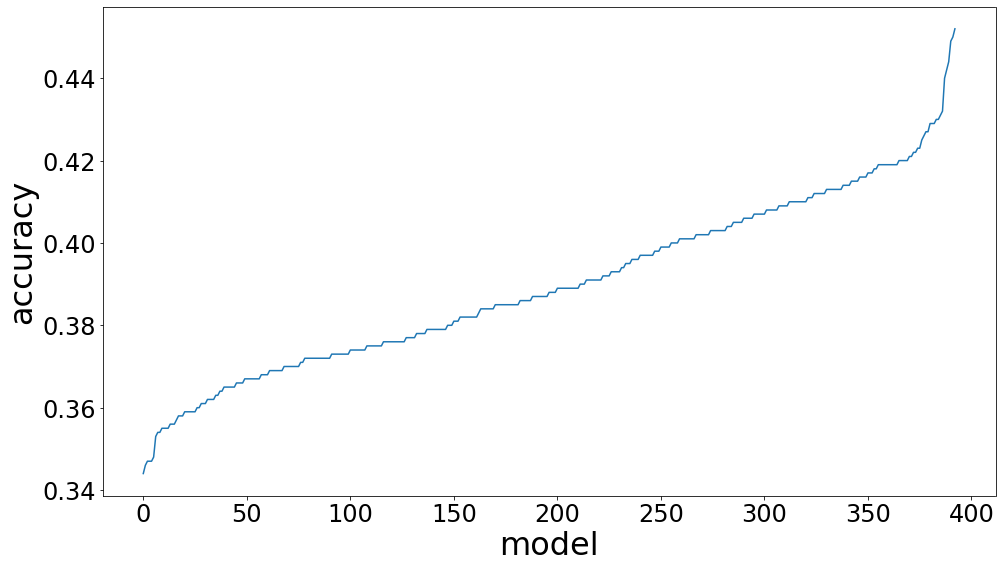

In [97]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(acc)
ax.set_xlabel('model')
ax.set_ylabel('accuracy')

In [ ]:
actions = ['left', 'none', 'right']
data_dir = '../data/train'

data_dct = {}
for action in actions:
    if action not in data_dct:
        data_dct[action] = []

    data_sub_dir = os.path.join(data_dir, action)
    for item in os.listdir(data_sub_dir):
        data = np.load(os.path.join(data_sub_dir, item))
        for datum in data:
            data_dct[action].append(datum)

In [ ]:
left = np.array(data_dct['left']).mean(axis=2)
none = np.array(data_dct['none']).mean(axis=2)
right = np.array(data_dct['right']).mean(axis=2)

In [185]:
actions = ['left', 'none', 'right']
data_dir = '../data/test'

data_test_dct = {}
for action in actions:
    if action not in data_test_dct:
        data_test_dct[action] = []

    data_sub_dir = os.path.join(data_dir, action)
    for item in os.listdir(data_sub_dir):
        data = np.load(os.path.join(data_sub_dir, item))
        for datum in data:
            data_test_dct[action].append(datum)

In [186]:
data_test_dct

{'left': [], 'none': [], 'right': []}

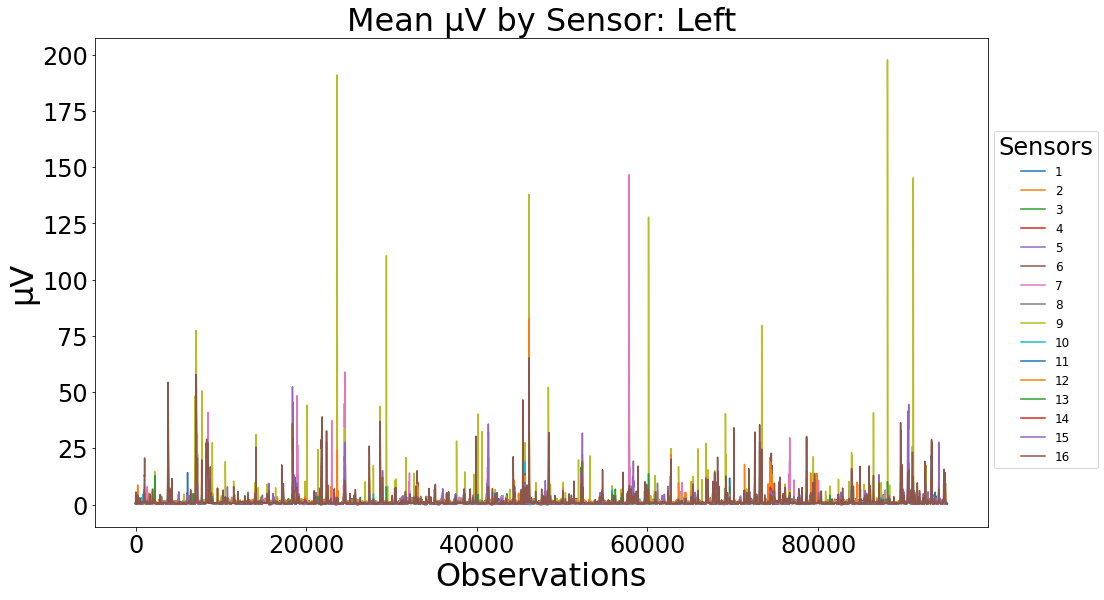

In [92]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(left, label=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

ax.set_xlabel('Observations')
ax.set_ylabel('µV')
ax.set_title('Mean µV by Sensor: Left')

fig.legend(title='Sensors')

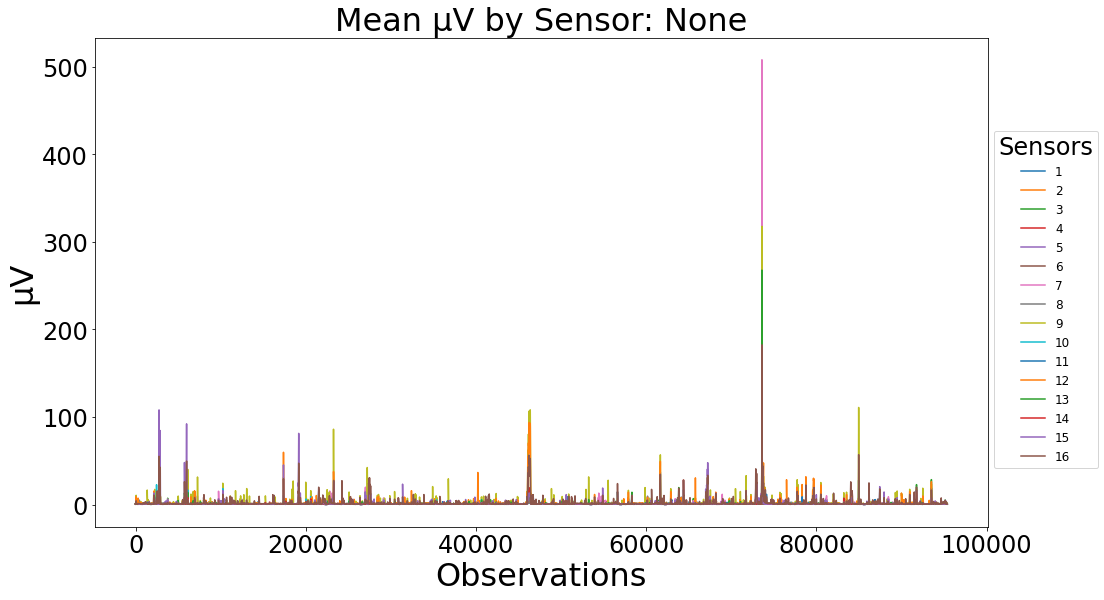

In [94]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(none, label=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

ax.set_xlabel('Observations')
ax.set_ylabel('µV')
ax.set_title('Mean µV by Sensor: None')

fig.legend(title='Sensors')

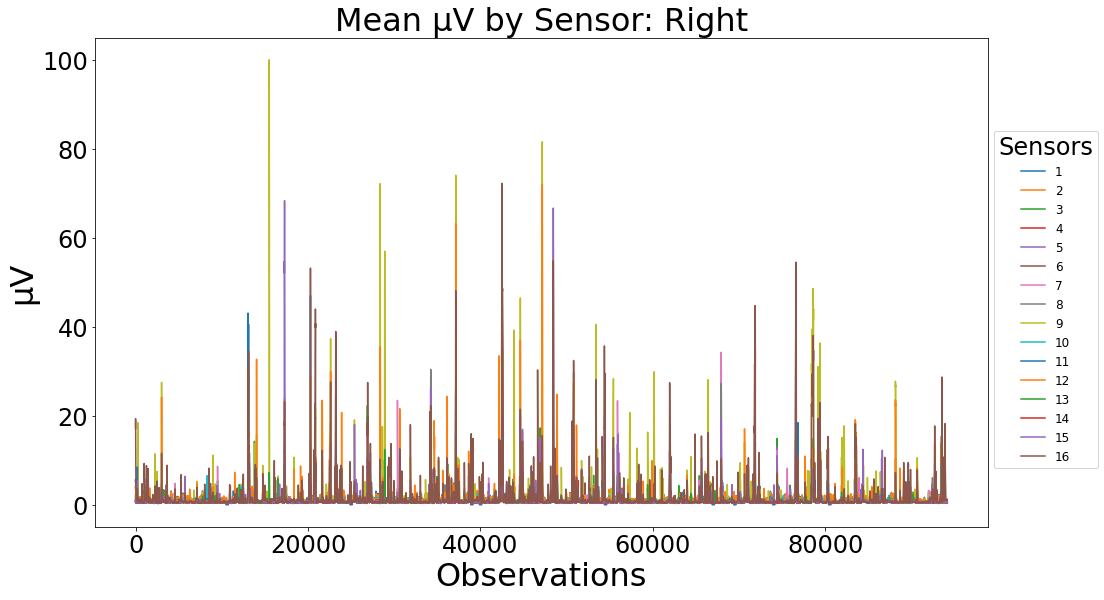

In [93]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(right, label=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

ax.set_xlabel('Observations')
ax.set_ylabel('µV')
ax.set_title('Mean µV by Sensor: Right')

fig.legend(title='Sensors')

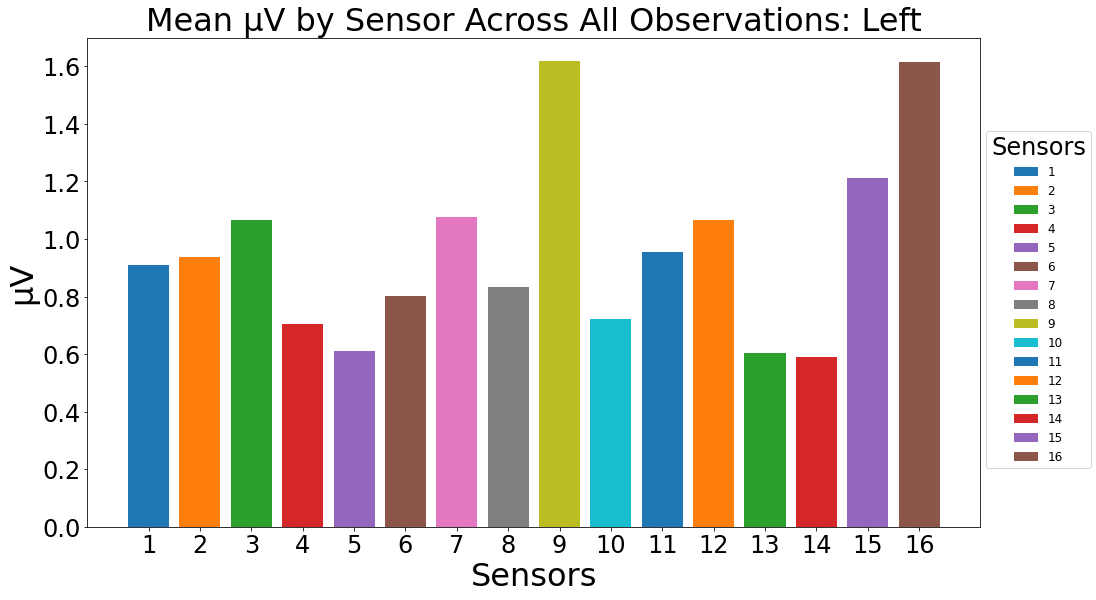

In [169]:
fig, ax = plt.subplots(figsize=(16, 9))

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
          'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
          'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange',
          'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

for i in x:
    ax.bar(x[i], left.mean(axis=0)[i], color=colors[i], label=x[i]+1)

ax.set_xticks(range(0, 16))
ax.set_xticklabels(range(1, 17))    

ax.set_xlabel('Sensors')
ax.set_ylabel('µV')
ax.set_title('Mean µV by Sensor Across All Observations: Left')

fig.legend(title='Sensors')

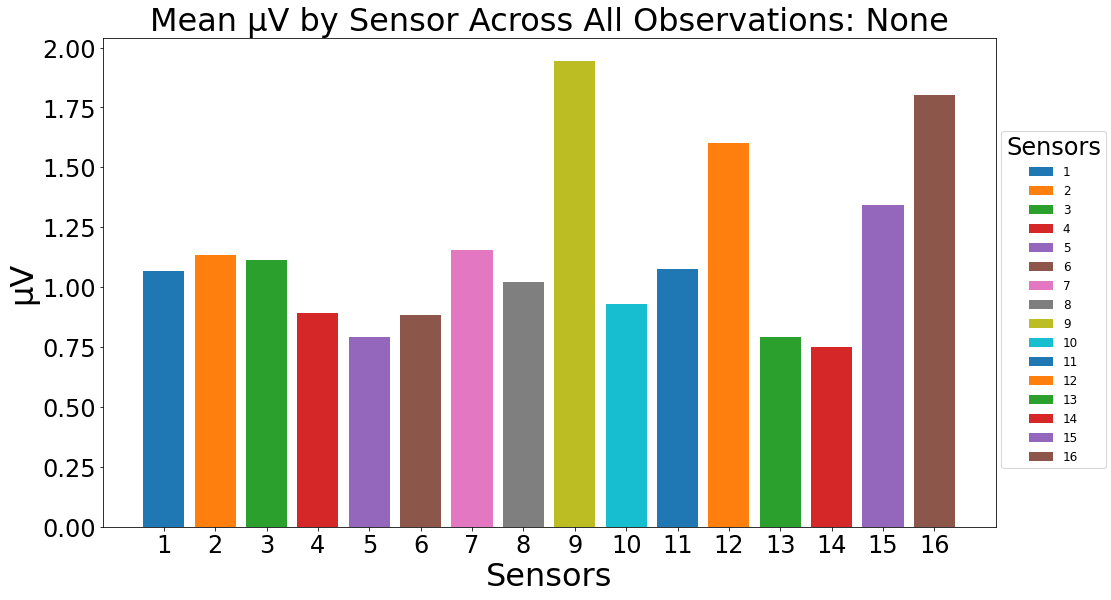

In [168]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.arange(16)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
          'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
          'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange',
          'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

for i in x:
    ax.bar(x[i], none.mean(axis=0)[i], color=colors[i], label=x[i]+1)

ax.set_xticks(range(0, 16))
ax.set_xticklabels(range(1, 17))    

ax.set_xlabel('Sensors')
ax.set_ylabel('µV')
ax.set_title('Mean µV by Sensor Across All Observations: None')

fig.legend(title='Sensors')

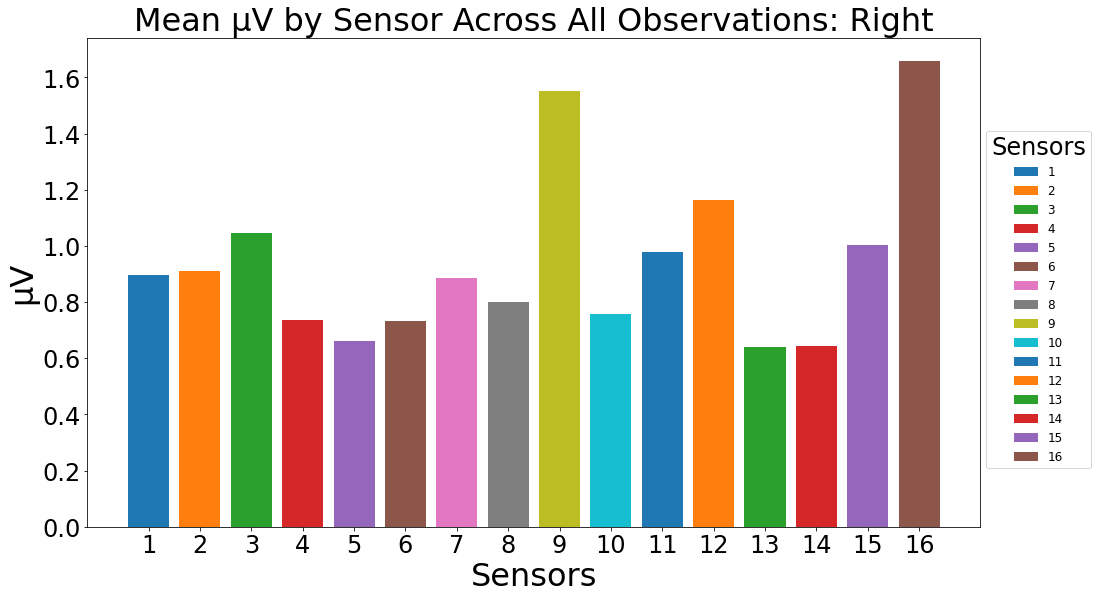

In [167]:
fig, ax = plt.subplots(figsize=(16, 9))

for i in x:
    ax.bar(x[i], right.mean(axis=0)[i], color=colors[i], label=x[i]+1)

ax.set_xticks(range(0, 16))
ax.set_xticklabels(range(1, 17))    

ax.set_xlabel('Sensors')
ax.set_ylabel('µV')
ax.set_title('Mean µV by Sensor Across All Observations: Right')

fig.legend(title='Sensors')

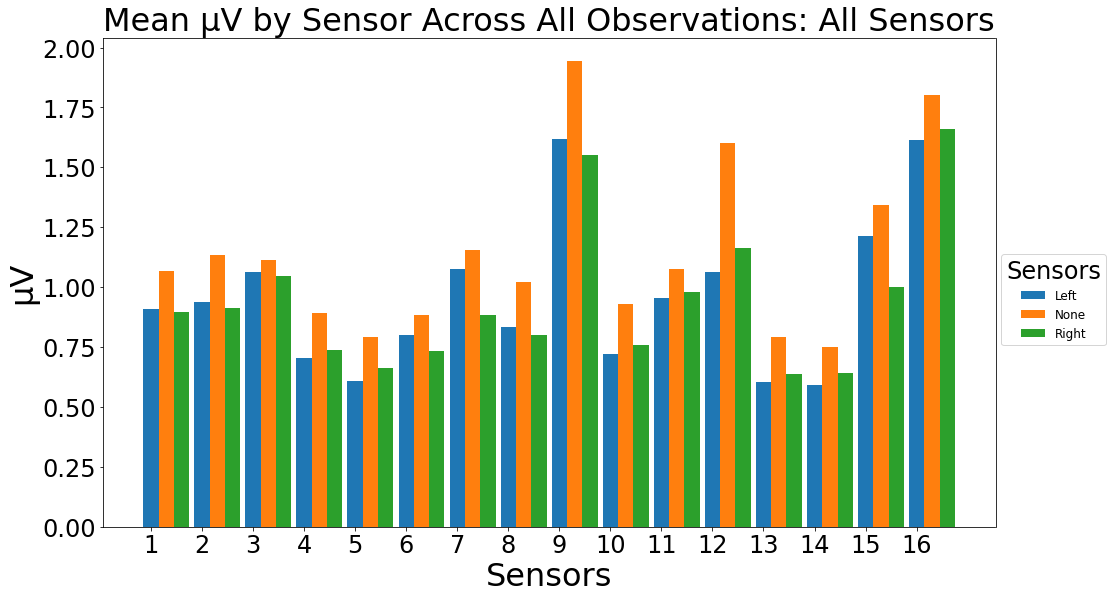

In [166]:
fig, ax = plt.subplots(figsize=(16, 9))

bar_width = 0.3

ax.bar(x, left.mean(axis=0), color=colors[0], label='Left', width=bar_width)
ax.bar(x+bar_width, none.mean(axis=0), color=colors[1], label='None', width=bar_width)
ax.bar(x+bar_width*2, right.mean(axis=0), color=colors[2], label='Right', width=bar_width)

ax.set_xticks(range(0, 16))
ax.set_xticklabels(range(1, 17))    

ax.set_xlabel('Sensors')
ax.set_ylabel('µV')
ax.set_title('Mean µV by Sensor Across All Observations: All Sensors')

fig.legend(title='Sensors')

In [184]:
# training shape
print('left')
print(np.array(data_dct['left']).shape)
print('none')
print(np.array(data_dct['none']).shape)
print('right')
print(np.array(data_dct['right']).shape)

left
(95125, 16, 60)
none
(95375, 16, 60)
right
(94125, 16, 60)
